<a href="https://colab.research.google.com/github/aasiro/dimension-reduction/blob/main/dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Часть 1. Проведение первичного дескриптивного анализа и модели классификации

---
Мы используем датасет с данными о факте мошенничества среди европейцев-владельцев кредитных кард в сентябре 2013 с [kaggle.com](https://www.kaggle.com/mlg-ulb/creditcardfraud/). Всего 2 признака - время и количество неизменены, остальные 28 показателей были уже так или иначе изменены с помощью PCA из-за соблюдений правил безопасности. Так как нет точной информации по каждой из синтетической переменной о ее информативности, по дефолту считаем их 100% и возможным сокращать в дальнем это количество. 




In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving creditcard.csv to creditcard (3).csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict,cross_val_score,train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('C:\\Users\\asirotina\\Documents\\math\\task\\archive\\creditcard.csv')
df.shape

(284807, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Первичный анализ данных показывает, что выборка очень сильно несбалансирована, мошеннических транзакций было всего 0,17% от общей выборки.

In [ ]:
df['hour'] = df['Time'].apply(lambda x: round(x / 3600))

In [ ]:
df['hour'][:-20]

0          0
1          0
2          0
3          0
4          0
          ..
284782    48
284783    48
284784    48
284785    48
284786    48
Name: hour, Length: 284787, dtype: int64

In [ ]:
low = df.groupby(['hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
desc = pd.DataFrame(low)
desc.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
desc.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0,0,0.00,7712.43,2259,154937.19,68.586627,15.00,59034.248847
1,0,1,0.00,529.00,2,529.00,264.500000,264.50,139920.500000
2,1,0,0.00,2909.97,3160,191087.48,60.470722,15.97,22435.924669
3,1,1,239.93,239.93,1,239.93,239.930000,239.93,NaN
4,2,0,0.00,4002.88,1491,106292.92,71.289685,21.49,30603.434140


In [ ]:
lil = df[['Amount','Class']].copy()
real = lil.loc[lil['Class'] == 0]['Amount']
fraud = lil.loc[lil['Class'] == 1]['Amount']
fraud.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
real.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Интересно, что в среднем мошенническая транзакция больше настоящий, но при этом и среднее отклононение хоть и примерно одинаковое, но очевиндно, что разница в разбросах между реальными и мошенническими данными слишком высока, что может указывать на непоследотельность мошенников при переводе средств


---

Построим матрицу корреляции Пирсона между всеми признаками датасета

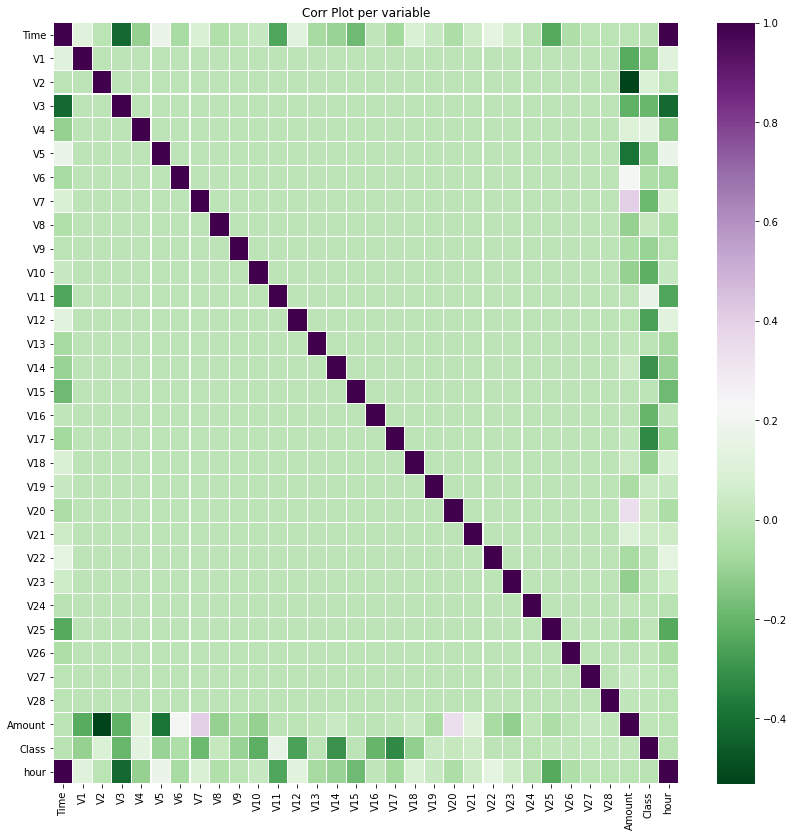

In [ ]:
plt.figure(figsize = (14,14))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.1,cmap="PRGn_r")
plt.title('Corr Plot per variable')
plt.show()

Как видно из матрицы, наиболее коррелированы отрицательно с Amount V2 и V5, а позитивно - V7 И V20 

Посчитаем логарифмы количества и времени транзакций, чтобы эти переменные не сильно отличались по разбросу от остальных

In [ ]:
df['lgamount'] = np.log10(df['Amount'])
df['lgamount']  = df.apply(lambda x: df['lgamount'])

C:\Users\asirotina\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df['lgamount'].describe()

count    2.848070e+05
mean             -inf
std               NaN
min              -inf
25%      7.481880e-01
50%      1.342423e+00
75%      1.887420e+00
max      4.409784e+00
Name: lgamount, dtype: float64

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,lgamount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,2.174990
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.429752
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,2.578249
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,2.091667
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1.845036


In [ ]:
y = df['Class'].values
X = df.iloc[:,1:30]
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state = 22)

In [ ]:
y_new_test = np.bincount(y_test)
ii_test = np.nonzero(y_new_test)[0]
y_new_train = np.bincount(y_train)
ii_train = np.nonzero(y_new_train)[0]
np.vstack((ii_train,y_new_train[ii_train])).T

array([[     0, 227451],
       [     1,    394]], dtype=int64)

In [ ]:
np.vstack((ii_test,y_new_test[ii_test])).T

array([[    0, 56864],
       [    1,    98]], dtype=int64)

Арифметически можно проверить, что сплит тест отлично разделил выборку на тестовую и обучающую, учитывая пропорции между реальными данным

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

pred = model.predict(X_test)

C:\Users\asirotina\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


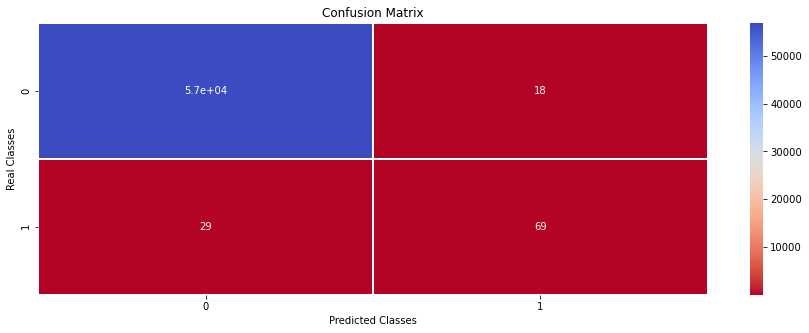

In [ ]:
cm = confusion_matrix(y_test,pred)
fig = plt.figure(figsize=(15,5))
sns.heatmap(cm,cmap='coolwarm_r',linewidths=0.5,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')
plt.show()

In [ ]:
 print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.70      0.75        98

    accuracy                           1.00     56962
   macro avg       0.90      0.85      0.87     56962
weighted avg       1.00      1.00      1.00     56962



Конечно, общие результаты качества модели неплохие, но очевидно, что полагаться исключительно на матрицу неопредленностей, так как датасет очень несбалансирован, то и полагаться на эти данные не стоит

In [ ]:
model_bal = LogisticRegression(class_weight='balanced')
model_bal.fit(X_train,y_train)

pred_bal = model_bal.predict(X_test)

C:\Users\asirotina\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


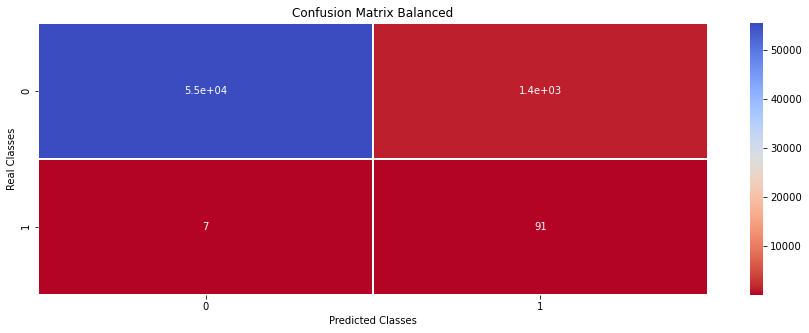

In [ ]:
cm_bal = confusion_matrix(y_test,pred_bal)
fig = plt.figure(figsize=(15,5))
sns.heatmap(cm_bal,cmap='coolwarm_r',linewidths=0.5,annot=True)
plt.title('Confusion Matrix Balanced')
plt.ylabel('Real Classes')
plt.xlabel('Predicted Classes')
plt.show()

In [ ]:
 print(classification_report(y_test,pred_bal))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.93      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



Очевидно, что результаты стали хуже. Подберем гиперпараметры для первой модели, так как все слишком хорошо на несбалансированной выборке. Посмотрим на результаты roc_auc, который способен лучше работать с подобными данными в силу своего рангового характера и добавим регуляризор L1, так как он сильнее штрафует за неверные ответы

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [ ]:
grid_searcher = GridSearchCV(
    LogisticRegression(max_iter=4000, solver='liblinear', random_state=22),
    param_grid={
        'C': [0.01, 0.1, 1, 10, 100, 10000],
        'penalty': ['l1']
    },
    cv=3,
    scoring='roc_auc'
)

In [ ]:
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=4000, random_state=22,
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 10000],
                         'penalty': ['l1']},
             scoring='roc_auc')

In [ ]:
print(roc_auc_score(y_train, grid_searcher.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, grid_searcher.predict_proba(X_test)[:, 1]))

0.979178981752906
0.9898362939717249


In [ ]:
pd.DataFrame(grid_searcher.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.651450,0.094371,0.034555,0.012264,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.956842,0.972145,0.979399,0.969462,0.009402,6
1,2.233800,1.023354,0.033074,0.005019,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.961638,0.977959,0.989872,0.976490,0.011573,1
2,5.544683,0.030825,0.029737,0.001750,1,l1,"{'C': 1, 'penalty': 'l1'}",0.955587,0.977490,0.987728,0.973602,0.013407,2
3,5.515788,0.824617,0.025963,0.001385,10,l1,"{'C': 10, 'penalty': 'l1'}",0.954675,0.976398,0.986982,0.972685,0.013448,3
4,5.108141,1.168581,0.027646,0.002059,100,l1,"{'C': 100, 'penalty': 'l1'}",0.954592,0.976282,0.986912,0.972596,0.013450,4
5,5.216530,0.732294,0.026840,0.000656,10000,l1,"{'C': 10000, 'penalty': 'l1'}",0.954583,0.976271,0.986905,0.972586,0.013450,5


In [ ]:
grid_searcher.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [ ]:
grid_searcher.best_score_

0.9764898093324911

В целом, мы видим, что даже на несбалансированной выборке roc_auc показывает очень хорошие усредненные результаты, особенно с гиперпараметром 0,1

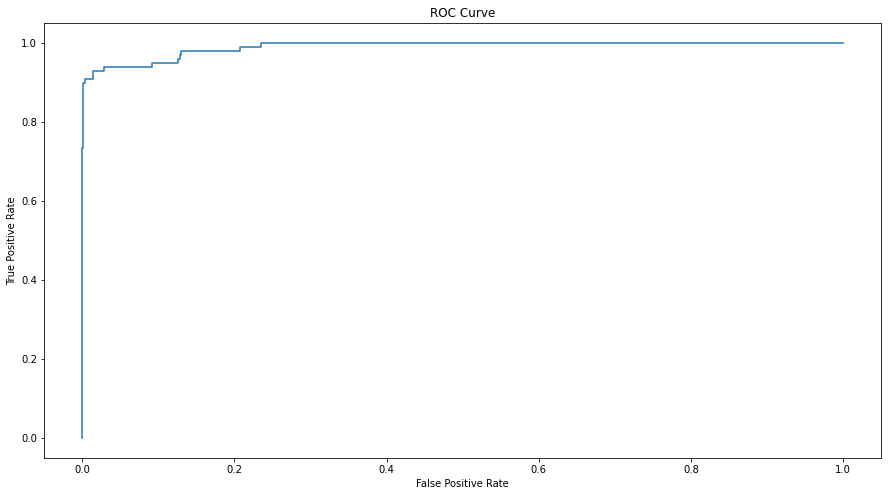

In [ ]:
fig = plt.figure(figsize=(15,8))

plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

tpr,fpr,_ = roc_curve(y_test, grid_searcher.predict_proba(X_test)[:, 1])

plt.plot(tpr,fpr)

plt.show()

# Часть 2. Сокращение размерности

---
хоть мы и знаем, что фактически датасет состоит из уже готовых PCA, но вводным данным к описанию датасета было сказано, что единственной целью данного преобразования было изменение личных данных, поэтому предположим, что эти синтетические переменные можно между собой сравнить, более того, как мы уже видели ранее они не сильно коррелированы между собой, что возможно даст неплохой результат.


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2, random_state = 0)
df_pca = pca.fit_transform(X)

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\asirotina\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


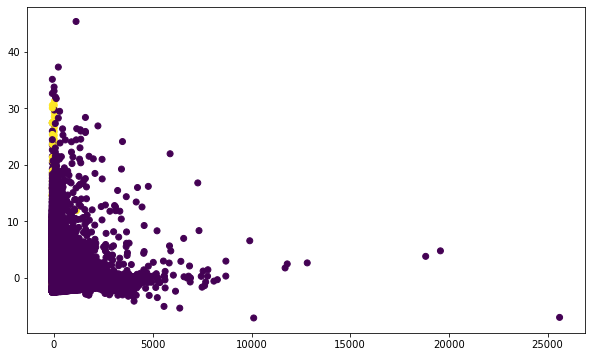

In [ ]:
pylab.figure(figsize = (10, 6))
pylab.scatter(df_pca[:, 0], df_pca[:, 1], c = y)

Посчитаем pca только по неизвестным переменным бех amount, затем сделаем массив из 2 веторов - реузльтата pca и amount, посчитаем логитрегрессию и сравним с большим датасетом

In [ ]:
pca = PCA(n_components = 2, random_state = 22)
df_pca_2 = pca.fit_transform(X.iloc[:, :-1])

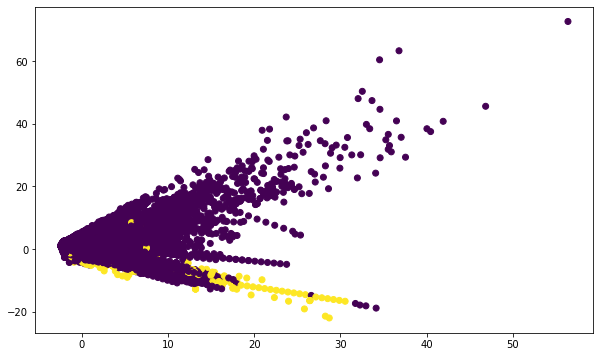

In [ ]:
pylab.figure(figsize = (10, 6))
pylab.scatter(df_pca_2[:, 0], df_pca_2[:, 1], c = y)

In [ ]:
df_pca_2

array([[ 1.35980239,  0.07263673],
       [-1.19184826, -0.26622958],
       [ 1.35834701,  1.3402336 ],
       ...,
       [-1.91955675,  0.30108016],
       [ 0.24045025, -0.53055874],
       [ 0.53340675,  0.18973817]])

In [ ]:
data = pd.DataFrame(df_pca_2,  columns=['pca_1', 'pca_2'])

In [ ]:
data['amount'] = X['Amount']
data.head()

,pca_1,pca_2,amount
0,1.359802,0.072637,149.62
1,-1.191848,-0.266230,2.69
2,1.358347,1.340234,378.66
3,0.966283,0.185460,123.50
4,1.158198,-0.877737,69.99


In [ ]:
model_pca = LogisticRegression(C=0.1, penalty = 'l1', random_state = 22, solver = 'liblinear')
model_pca.fit(df_pca, y)
print(classification_report(model_pca.predict(df_pca), y))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284759
           1       0.04      0.42      0.07        48

    accuracy                           1.00    284807
   macro avg       0.52      0.71      0.54    284807
weighted avg       1.00      1.00      1.00    284807



In [ ]:
print(roc_auc_score(y, model_pca.predict_proba(df_pca)[:, 1]))

0.7942980196733012


In [ ]:
model_pca.predict_proba(df_pca)[:, 1]

array([0.00179403, 0.00095228, 0.00146982, ..., 0.00072096, 0.00143393,
       0.00134484])

Очевидно, что качество модели после сокращения размерности до 2 переменных сократилось достаточно сильно, по показателям точности, полноты и f1 заметно, что несмотря на то, что предсказания с настоящими транзакциями работает хорошо, то к мошенничеству модель восприимчива намного хуже, чем логрегрессия со всеми признаками

In [ ]:
model_pca_2 = LogisticRegression(C=0.1, penalty = 'l1', random_state = 22, solver = 'liblinear')
model_pca_2.fit(data, y)
print(classification_report(model_pca_2.predict(data), y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284752
           1       0.08      0.71      0.14        55

    accuracy                           1.00    284807
   macro avg       0.54      0.85      0.57    284807
weighted avg       1.00      1.00      1.00    284807



In [ ]:
print(roc_auc_score(y, model_pca_2.predict_proba(data)[:, 1]))

0.8738227838726342


Очевидно, что по сокращение размерности лучше работает на уже отобранных признаках без поля amount. Но все же качество модели было лучше до сокращения размерности

In [ ]:
from sklearn import manifold

Так как многомерное масштабирование и t-sne очень тяжелые метод, отрежем часть данных, чтобы удостовериться, что все работает нормально. для этого сначала обрежем данные, вновь посчитаем обычную логрегрессию с roc_auc и затем сравним с результатами по MDS и t-sne

In [ ]:
sample = df.sample(n=4000, random_state=22)

In [ ]:
sample = sample.reset_index(drop=True)

In [ ]:
sample.shape

(4000, 32)

In [ ]:
sample['Class'].value_counts()

0    3996
1       4
Name: Class, dtype: int64

In [ ]:
y_red = sample['Class'].values
X_red = sample.iloc[:,1:29]

In [ ]:
mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
df_mds = mds.fit_transform(X_red)

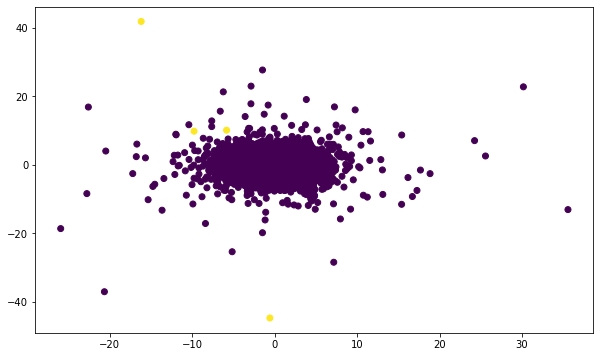

In [ ]:
pylab.figure(figsize=(10, 6))
pylab.scatter(df_mds[:, 0], df_mds[:, 1], c = y_red)

In [ ]:
model_mds = LogisticRegression(C=0.1, penalty = 'l1', random_state = 22, solver = 'liblinear')
model_mds.fit(df_mds, y_red)
print(classification_report(model_mds.predict(df_mds), y_red))
print(roc_auc_score(y_red, model_mds.predict_proba(df_mds)[:, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       0.00      0.00      0.00         0

    accuracy                           1.00      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       1.00      1.00      1.00      4000

0.7469969969969971


C:\Users\asirotina\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asirotina\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asirotina\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Здесь мы получаем вполне ожидаемый плохой результат из-за очень маленького датасета. Последняя попытка t-sne

In [ ]:
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 22)
df_tsne = tsne.fit_transform(X_red)

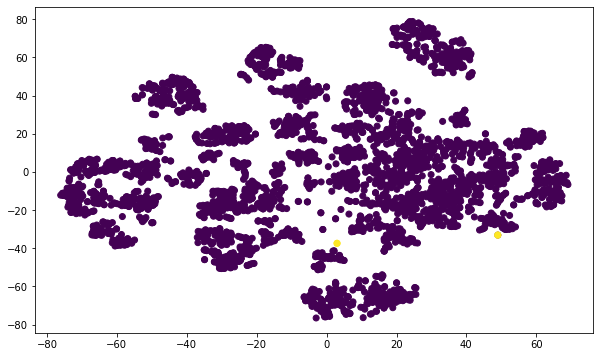

In [ ]:
pylab.figure(figsize=(10, 6))
pylab.scatter(df_tsne[:, 0], df_tsne[:, 1], c = y_red)

In [ ]:
model_tsne = LogisticRegression(C=0.1, penalty = 'l1', random_state = 22, solver = 'liblinear')
model_tsne.fit(df_tsne, y_red)
print(classification_report(model_tsne.predict(df_tsne), y_red))
print(roc_auc_score(y_red, model_tsne.predict_proba(df_tsne)[:, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       0.00      0.00      0.00         0

    accuracy                           1.00      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       1.00      1.00      1.00      4000

0.8796296296296297


C:\Users\asirotina\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asirotina\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asirotina\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Качество по roc_auc даже чуть лучше, чем в случае модели pca, но по-прежнему плохое относительно мошенников, хотя это предсказуемо из-за очень малого числа наблюдений в сокращенной выборке

# Часть 3. Feature importance

In [ ]:
model_fi = LogisticRegression(C=0.1, penalty = 'l1', random_state = 22, solver = 'liblinear')
model_fi.fit(X_train, y_train)
print(classification_report(model_fi.predict(X_train), y_train))
print(roc_auc_score(y_train, model_fi.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, model_fi.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227574
           1       0.63      0.91      0.74       271

    accuracy                           1.00    227845
   macro avg       0.81      0.96      0.87    227845
weighted avg       1.00      1.00      1.00    227845

0.979178981752906
0.9898362939717249


Feature: 0, Score: 0.01823
Feature: 0, Score: 0.00000
Feature: 0, Score: 0.00000
Feature: 0, Score: 0.56190
Feature: 0, Score: 0.07132
Feature: 0, Score: -0.04774
Feature: 0, Score: 0.00000
Feature: 0, Score: -0.19615
Feature: 0, Score: -0.03041
Feature: 0, Score: -0.48211
Feature: 0, Score: 0.07548
Feature: 0, Score: -0.07127
Feature: 0, Score: -0.28178
Feature: 0, Score: -0.60772
Feature: 0, Score: 0.00000
Feature: 0, Score: -0.26083
Feature: 0, Score: -0.07018
Feature: 0, Score: 0.00000
Feature: 0, Score: 0.00000
Feature: 0, Score: -0.08151
Feature: 0, Score: 0.18208
Feature: 0, Score: 0.18197
Feature: 0, Score: -0.07036
Feature: 0, Score: 0.00000
Feature: 0, Score: 0.00000
Feature: 0, Score: 0.00000
Feature: 0, Score: -0.08920
Feature: 0, Score: 0.00000
Feature: 0, Score: 0.00001


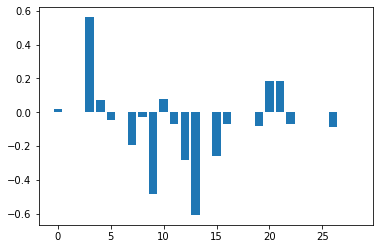

In [ ]:
importance = model_fi.coef_[0]

for v in importance:
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Понятно только то, что ничего не понятно.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [ ]:
fi = SelectFromModel(model_fi,threshold = -np.inf, max_features=5)

In [ ]:
fi.fit(X_train, y_train)
fearure = fi.get_support()
names = X.columns[fearure]


In [ ]:
names

Index(['V4', 'V10', 'V13', 'V14', 'V16'], dtype='object')

In [ ]:
new = pd.DataFrame()
for i in df.columns:
    if i in names:
        new[i] = df[i]


new.head(5)    

,V4,V10,V13,V14,V16
0,1.378155,0.090794,-0.991390,-0.311169,-0.470401
1,0.448154,-0.166974,0.489095,-0.143772,0.463917
2,0.379780,0.207643,0.717293,-0.165946,-2.890083
3,-0.863291,-0.054952,0.507757,-0.287924,-1.059647
4,0.403034,0.753074,1.345852,-1.119670,-0.451449


In [ ]:
new_train, new_test, y_train,y_test = train_test_split(new,y, test_size = 0.2, stratify=y, random_state = 22)

In [ ]:
model_fis = LogisticRegression()
model_fis.fit(new_train, y_train)
print(classification_report(model_fis.predict(new_train), y_train))
print(roc_auc_score(y_train, model_fis.predict_proba(new_train)[:, 1]))
print(roc_auc_score(y_test, model_fis.predict_proba(new_test)[:, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227571
           1       0.62      0.89      0.73       274

    accuracy                           1.00    227845
   macro avg       0.81      0.94      0.86    227845
weighted avg       1.00      1.00      1.00    227845

0.9730659676641014
0.982460299116833


После удаления "неважных" признаков качество модели отличное, но все равно хуже, чем в изначальном модели с настроенными гиперпараметрами и со всеми признаками.

# Часть 4. Деревья и shap-values

Попробуем сделать простейший градиентный бустинг, так как он считается одним из самых продвинутых методов в ml

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

In [ ]:
params = {'objective': 'binary:logistic','eta': 0.03,'silent': True,'max_depth': 2,'colsample_bytree': 0.9,'eval_metric': 'auc',
'random_state': 22 }

In [ ]:
num_round = 100
max_round = 1000


In [ ]:
model = xgb.train(params, 
                dtrain, 
                num_round, 
                maximize=True)

[21:24:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [ ]:
prod = model.predict(dtest)

In [ ]:
print(roc_auc_score(y_train, model.predict(dtrain)))

0.9207977957521591


In [ ]:
print(roc_auc_score(y_test, prod))

0.9383065251283406


Нормально, но знаем, что бывало и лучше, попробуем shap_value

In [ ]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import shap

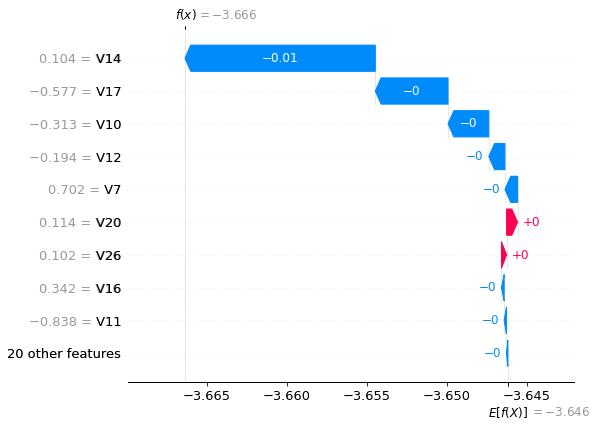

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)


shap.plots.waterfall(shap_values[0])

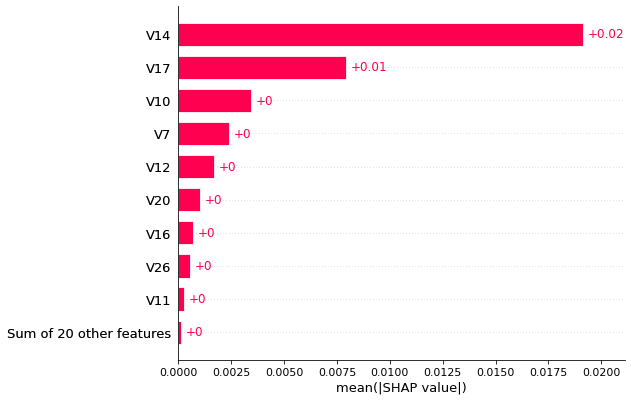

In [ ]:
shap.plots.bar(shap_values)

Очевидно, что только 2 переменные приносят вклад: V14 и V17.отрежем только эти данные и снова обучим градиентный бустинг

In [ ]:
last = df[['V14', 'V17']].copy()

In [ ]:
last_train, last_test, y_train,y_test = train_test_split(last,y, test_size = 0.2, stratify=y, random_state = 22)

In [ ]:
lasttrain = xgb.DMatrix(last_train, y_train)
lasttest = xgb.DMatrix(last_test, y_test)

In [ ]:
lastmodel = xgb.train(params, 
                lasttrain, 
                num_round, 
                maximize=True)

[21:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [ ]:
lastprod = lastmodel.predict(lasttest)

In [ ]:
print(roc_auc_score(y_test, lastprod))

0.9519889202163703


In [ ]:
print(roc_auc_score(y_train, lastmodel.predict(lasttrain)))

0.9390091427512686


Опять же, чуть лучше, но не супер. Лучше всех отработала обычная логистическая регрессия с l1-регуляризатором. Их всех возможных сокращений лучше всего были результаты путем удаления до 5 наиболее важных признаков, которые были обнаружены с помощью feature importance. 
Таким образом, можно сделать вывод, что конкретный датасет показал, что не всегда понижение размерности способно улучшить качество модели, но тем не менее является отличным инструментом, позволяющим отследить наиболее важные для модели признаки